In [60]:
import glob 
import json
import numpy as np

from matplotlib import pyplot as plt
from scipy.stats import spearmanr

In [61]:
# Change it
path2naslogs = '/scratch/andrey/nas/nas-bench-nlp-release/train_logs_multi_runs/*.json'
path2modellogs = '/scratch/andrey/nas/test/logs/*.json'

In [62]:
test_scores = []
logs = sorted(glob.glob(path2naslogs))
for log_name in logs[:100]:
    log = json.load(open(log_name, 'r'))
    test_scores.append(np.mean(log['test_losses']))

/home/filatov/miniconda/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/filatov/miniconda/envs/py38/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [63]:
scores = {'zenas': [], 'gradnorm': [], 'tenas': []}
my_logs = sorted(glob.glob(path2modellogs))
for log_name in my_logs[:100]:
    log = json.load(open(log_name, 'r'))
    scores['zenas'].append(log['zenas'])
    scores['gradnorm'].append(log['gradnorm'])
    scores['tenas'].append(log['tenas'])

In [64]:
zenas = np.array(scores['zenas'])
gradnorm = np.array(scores['gradnorm'])
tenas = np.array(scores['tenas'])
test = np.array(test_scores)

In [65]:
zenas_ids = np.where(zenas > 0)[0]
test_ids = np.where(test > 0)[0]

ids = np.intersect1d(zenas_ids, test_ids)

In [66]:
zenas_filtered = zenas[ids]
gradnorm_filtered = gradnorm[ids]
tenas_filtered = tenas[ids]
test_filtered = test[ids]

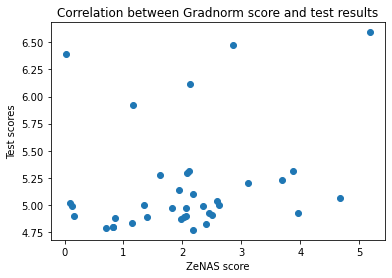

In [67]:
plt.scatter(zenas_filtered, test_filtered)
plt.title("Correlation between Gradnorm score and test results")
plt.ylabel("Test scores")
plt.xlabel("ZeNAS score")
plt.show()

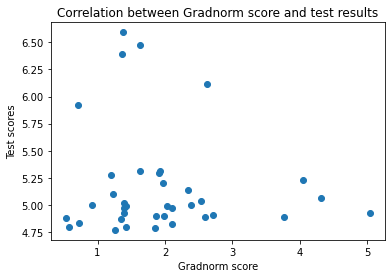

In [57]:
plt.scatter(gradnorm_filtered, test_filtered)

plt.title("Correlation between Gradnorm score and test results")
plt.ylabel("Test scores")
plt.xlabel("Gradnorm score")
plt.show()

In [69]:
spearmanr(gradnorm_filtered, test_filtered)

SpearmanrResult(correlation=0.07705073494547177, pvalue=0.6503544130468819)

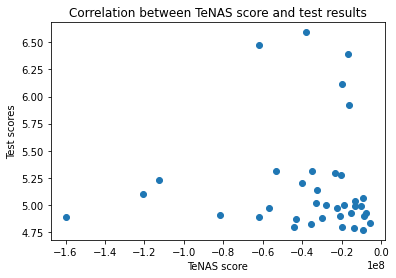

In [59]:
plt.scatter(tenas_filtered, test_filtered)
plt.title("Correlation between TeNAS score and test results")
plt.ylabel("Test scores")
plt.xlabel("TeNAS score")
plt.show()

In [70]:
spearmanr(tenas_filtered, test_filtered)

SpearmanrResult(correlation=-0.15860597439544807, pvalue=0.3484485771400251)